In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt

Load the mnist dataset:

In [59]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [60]:
x_train.shape

(60000, 28, 28)

In [61]:
x_test.shape

(10000, 28, 28)

Visualize some of the mnist data:

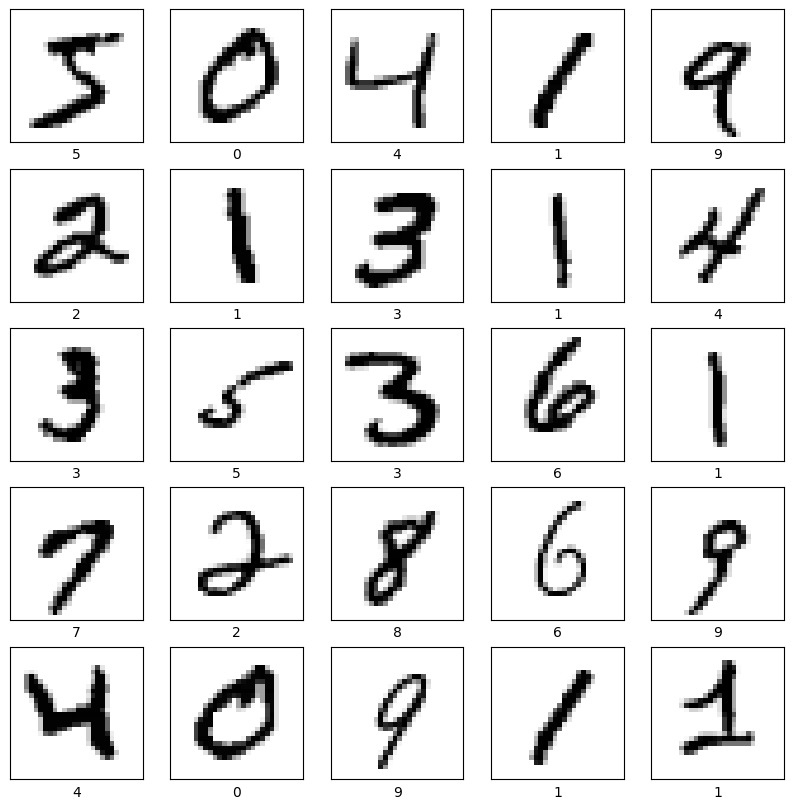

In [62]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

Build a network to process mnist:

In [65]:
# Define the fully connected model with a Flatten layer
model = Sequential([
    Flatten(input_shape=(28, 28)),        # Flatten the 28x28 input images to a 784-dimensional vector
    Dense(1024, activation="sigmoid"),
    Dense(512, activation="sigmoid"),
    Dense(256, activation="sigmoid"),
    Dense(128, activation="sigmoid"),     # First dense layer with 128 units
    Dense(64, activation="sigmoid"),      # Second dense layer with 64 units
    Dense(10, activation="sigmoid")       # Output layer with 10 units (for 10 classes) and softmax activation
])

# Compile the model
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"])

model.summary()

/Users/pngwen/Library/CloudStorage/OneDrive-UniversityofTennessee/Classes/CSCI 380/CSCI380-Examples-Fall2024/.venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,501,770 (5.73 MB)

 Trainable params: 1,501,770 (5.73 MB)

 Non-trainable params: 0 (0.00 B)

Train the model:

In [64]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_split=0.2, batch_size=1, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
train_loss, train_accuracy = model.evaluate(x_train, y_train)
error_ratio = test_loss/train_loss
print(f"Test accuracy: {test_accuracy}")
print(f"Train accuracy: {train_accuracy}")
print(f"Error Ratio: {error_ratio}")

Epoch 1/10
 7857/48000 ━━━━━━━━━━━━━━━━━━━━ 2:05 3ms/step - accuracy: 0.4022 - loss: 1.6588

KeyboardInterrupt: 

In [ ]:
print(f"Testing Loss: {test_loss}")
print(f"Training Loss: {train_loss}")

Testing Loss: 0.2030189335346222
Training Loss: 0.1886381357908249


## Error Ratio: Quantifying Overfitting and Underfitting

The **error ratio** is a simple way to assess whether a model is overfitting or underfitting. By calculating the ratio of the test error to the train error, you can evaluate how well the model generalizes to unseen data.

### 1. Formula for Error Ratio

\[
\text{Error Ratio} = \frac{\text{Test Error}}{\text{Train Error}}
\]

### 2. Interpretation of the Error Ratio

- **Error Ratio ≈ 1**: This indicates that the model is likely **generalizing well**. Both train and test errors are similar, suggesting the model is neither overfitting nor underfitting.
  
- **Error Ratio > 1 (Significantly Greater)**: This could indicate **overfitting**. The test error is substantially higher than the training error, showing that the model has memorized the training data rather than learning general patterns. A high error ratio (e.g., >1.5) often signals pronounced overfitting.

- **Error Ratio < 1**: This is uncommon but may suggest **underfitting** if both errors are high, as it indicates the model is performing poorly on both the train and test sets. In this case, the model hasn’t fit either set well, possibly due to an overly simple model structure or insufficient training.

### 3. Thresholds for Overfitting/Underfitting Detection

Thresholds can vary depending on the dataset and model complexity, but general guidelines include:
- **Overfitting**: Error Ratio > 1.2–1.5
- **Underfitting**: Error Ratio ≈ 1 but with high absolute errors on both train and test sets.

Using the error ratio as a guide, you can iteratively adjust your model’s complexity or regularization to achieve better generalization.